<a href="https://colab.research.google.com/github/lauBit/relacion-minutos-ingreso/blob/main/Calidad_del_vino_(Regresion_Lineal_Todas_las_variables).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 – Predecir la calidad del Vino

Participantes:
- Paola Romero
- Laura Camelo
- Fernando Montaño
- Daniel Garcia

**Explicación Breve del Problema**

El objetivo es plantear dos modelos para evaluar la calidad de las variedades rojas del vino portugués “Vinho Verde” según características físico-químicas.

**Nota:** en el presente ejercicio utilizamos **todas las variables** para realizar el entrenamiento del modelo

Prueba - Predecir la calidad del vino con todas las variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from math import sqrt

df = pd.DataFrame()
df = pd.read_csv('https://raw.githubusercontent.com/lauBit/relacion-minutos-ingreso/main/winequality-red.csv', sep=';')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (1599, 12)


In [ ]:
print('Nombre columnas:',df.columns)

Nombre columnas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


**5. Determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información**

**Cantidad de Variables**: 12

**Total de Registros por Variable**: 1599

**Clasificación de Variables**:
- `fixed acidity`: Númerica
- `volatile acidity`: Númerica
- `citric acid`: Númerica
- `residual sugar`: Númerica
- `chlorides`: Númerica
- `free sulfur dioxide`: Númerica
- `total sulfur dioxide`: Númerica
- `density`: Númerica
- `pH`: Númerica
- `sulphates`: Númerica
- `alcohol`: Númerica
- `quality`: Númerica


In [ ]:
corr = df.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

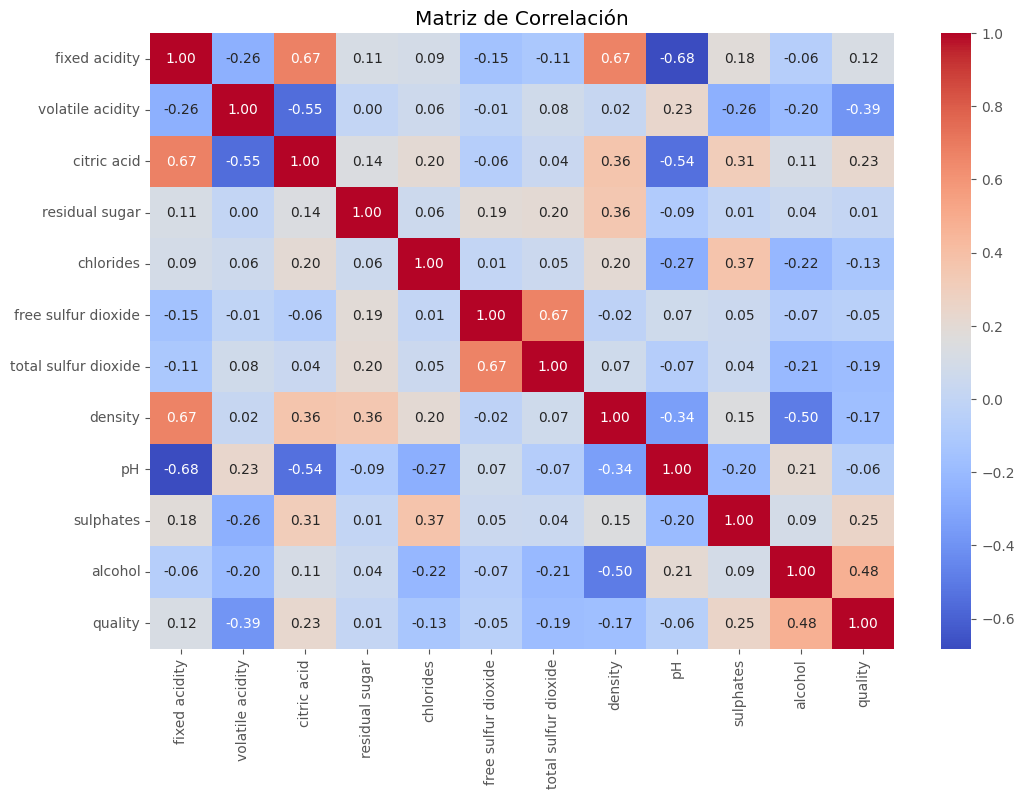

In [ ]:
# Graficar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlación')
plt.show()

Evidenciamos que la variable de calidad ("quality") no se encuentra altamente correlacionada con ninguna de las 11 variables fisico-quimicas. Se observa una correlación positiva de mediana intensidad entre las variables de calidad y alcohol, sin embargo cabe aclarar que una no indica causalidad de la otra.

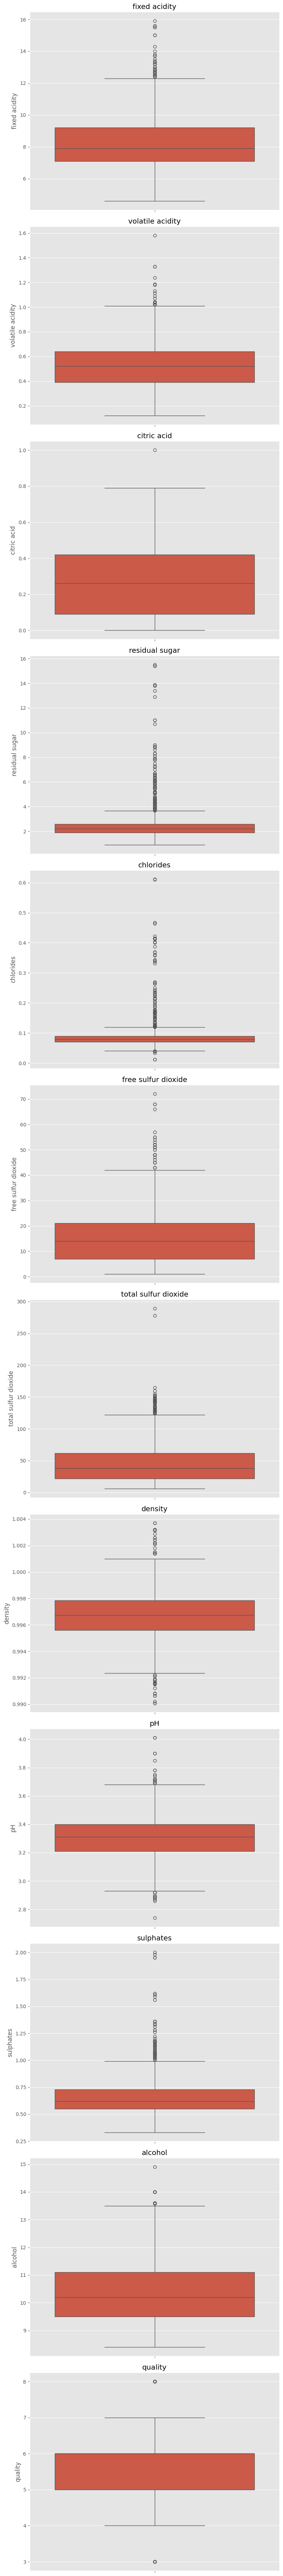

In [ ]:
# Transponer el DataFrame
df_transpuesto = df.T

# Crear un gráfico de boxplot para cada fila transpuesta
fig, axs = plt.subplots(len(df_transpuesto), 1, figsize=(8, 6*len(df_transpuesto)), sharex=True)

for i, columna in enumerate(df_transpuesto.index):
    sns.boxplot(data=df_transpuesto.loc[columna], ax=axs[i])
    axs[i].set_title(columna)
    axs[i].set_xlabel('')


plt.tight_layout()

plt.show()

Se observa que la mayoria de las variables presenta alta dispersión en los datos, sin embargo no se observan registros que requieran ser depurados para el desarrollo de la actividad.

 6. La variable quality es la variable objetivo, con lo consultado anteriormente haga una regresión lineal para predecir quality. Evalue los valores del error cuadrático medio y R2. Haga sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo.

In [ ]:
model_result = {}

x, y = df.drop('quality', axis='columns'), df['quality']

(1599, 11)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba, se dividen los datos en una propoción 80/20 (80% para entrenamiento y 20% para pruebas)
# shuffle baraja los datos antes de la división
# Ramdom Establece la aleatoriedad para tener la misma división de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45, shuffle=True)

In [ ]:
# conjunto de datos de entrenamiento de X
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
369,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0
458,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8
556,10.9,0.530,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.7
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4
...,...,...,...,...,...,...,...,...,...,...,...
163,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4
607,8.8,0.480,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5
1568,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.2
414,8.8,0.520,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61,9.5


In [ ]:
# conjunto de datos de prueba de X
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5
1541,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7
249,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1426,7.7,0.230,0.37,1.8,0.046,23.0,60.0,0.99710,3.41,0.71,12.1
179,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
417,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.5
1298,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2


In [ ]:
# conjunto de datos de entrenamiento de Y
y_train

369     7
458     7
32      5
556     6
145     5
       ..
163     5
607     6
1568    5
414     5
971     6
Name: quality, Length: 1279, dtype: int64

In [ ]:
# conjunto de datos de prueba de Y
y_test

69      6
1541    7
368     5
559     6
249     6
       ..
1426    6
179     5
417     5
1298    6
1062    6
Name: quality, Length: 320, dtype: int64

In [ ]:
#Genera una regresión lineal
lr = LinearRegression()
#Entrena el modelo con las variables de X y Y
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Utiliza el modelo de regresión para hacer predicciones sobre el conjunto de caracteristicas de X entrenamiento
y_lr_train_pred = lr.predict(X_train)
#Utiliza el modelo de regresión para hacer predicciones sobre el conjunto de caracteristicas de X pruebas
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([6.91899754, 6.16561289, 5.17680958, ..., 5.21043574, 5.11569022,
       6.35907895])

Se calculas las siguientes metricas de evaluación de regresión:



*   Error medio absoluto (MAE)
*   Error cuadrático medio (MSE)
*   Raíz del error cuadrático medio (RMSE)
*   Coeficiente de determinació (R^2)







In [ ]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_rmse = sqrt(lr_train_mse)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_rmse = sqrt(lr_test_mse)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)

In [ ]:
#Se imprime las variables

print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR RMSE (Train): ', lr_train_rmse)
print('LR MAE (Train): ', lr_train_mae)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)
print('LR RMSE (Test): ', lr_test_rmse)
print('LR MAE (Test): ', lr_test_mae)

LR MSE (Train):  0.4136809353858727
LR R2 (Train):  0.36296109606982563
LR RMSE (Train):  0.6431803288237854
LR MAE (Train):  0.4992849282403905
LR MSE (Test):  0.4391776420313224
LR R2 (Test):  0.3354839153613184
LR RMSE (Test):  0.6627047925217702
LR MAE (Test):  0.49862805100379487


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.413681,0.362961,0.439178,0.335484


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.436079,0.32847,0.479884,0.273892


In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.413681,0.362961,0.439178,0.335484
1,Random forest,0.436079,0.32847,0.479884,0.273892


Text(0.5, 0, 'Experimental LogS')

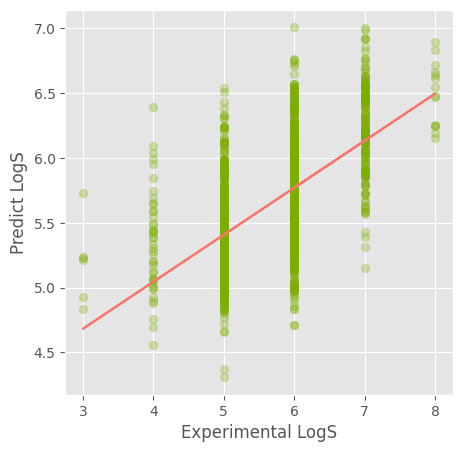

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

De acuerdo con los resultados obtenidos enlas metricas de evaluación de **regresión lineal**, identificamos:



*   Coeficiente de determinación (R2): se obtiene un total de 36% de efectividad del modelo entrenado, frente al 33% de los datos de prueba

Se reentrenará el modelo para mejorar el resultado de este.

